In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [113]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [52]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

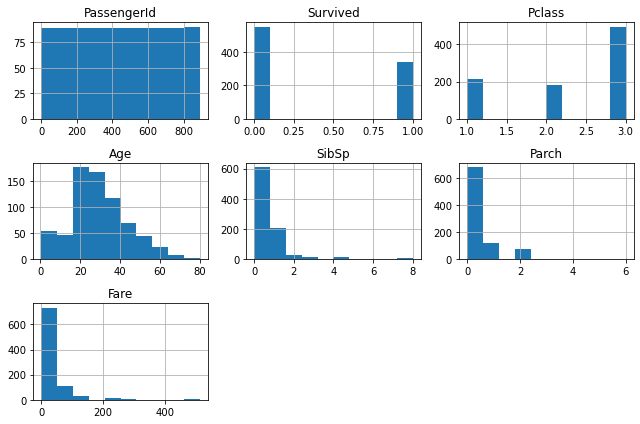

In [55]:
data.hist(figsize=(9,6))
plt.tight_layout()

In [56]:
corr = data.corr()
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [57]:
corr['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [58]:
#TRAINING DATA PREPROCESING

In [59]:
data_categorical = data[['Name','Sex','Ticket','Cabin','Embarked']] 
data_categorical

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [60]:
data_categorical.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [61]:
data_categorical = data_categorical.fillna('0')
data_categorical

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,0,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,0,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,0,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [62]:
ordinal_encoder = OrdinalEncoder()
data_categorical_encoded = pd.DataFrame(ordinal_encoder.fit_transform(data_categorical), columns = ['Name','Sex','Ticket','Cabin','Embarked'])
data_categorical_encoded

,Name,Sex,Ticket,Cabin,Embarked
0,108.0,1.0,523.0,0.0,3.0
1,190.0,0.0,596.0,82.0,1.0
2,353.0,0.0,669.0,0.0,3.0
3,272.0,0.0,49.0,56.0,3.0
4,15.0,1.0,472.0,0.0,3.0
...,...,...,...,...,...
886,548.0,1.0,101.0,0.0,3.0
887,303.0,0.0,14.0,31.0,3.0
888,413.0,0.0,675.0,0.0,3.0
889,81.0,1.0,8.0,61.0,1.0


In [63]:
data_numerical = data.drop(['Name','Sex','Ticket','Cabin','Embarked'], axis = 1)
data_numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [64]:
data_numerical.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [65]:
imputer = SimpleImputer(strategy='median')
data_numerical = pd.DataFrame(imputer.fit_transform(data_numerical), columns = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare'])
data_numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000
888,889.0,0.0,3.0,28.0,1.0,2.0,23.4500
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [66]:
df = pd.concat([data_numerical, data_categorical_encoded], axis = 1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,108.0,1.0,523.0,0.0,3.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,190.0,0.0,596.0,82.0,1.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,353.0,0.0,669.0,0.0,3.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,272.0,0.0,49.0,56.0,3.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,15.0,1.0,472.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000,548.0,1.0,101.0,0.0,3.0
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000,303.0,0.0,14.0,31.0,3.0
888,889.0,0.0,3.0,28.0,1.0,2.0,23.4500,413.0,0.0,675.0,0.0,3.0
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,81.0,1.0,8.0,61.0,1.0


In [67]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.038559,0.042939,-0.056554,-0.000637,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.057343,-0.543351,-0.164549,0.276235,-0.176509
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.052831,0.131900,0.319869,-0.537419,0.173511
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.048252,0.081163,-0.070382,0.164550,-0.031903
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.017230,-0.114631,0.079461,-0.024829,0.071480
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.049105,-0.245489,0.020003,0.033585,0.043351
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.049173,-0.182333,-0.013885,0.310987,-0.230365
Name,-0.038559,-0.057343,0.052831,0.048252,-0.017230,-0.049105,-0.049173,1.000000,0.020314,0.047348,0.003122,-0.010633
Sex,0.042939,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,0.020314,1.000000,0.059372,-0.137704,0.118492
Ticket,-0.056554,-0.164549,0.319869,-0.070382,0.079461,0.020003,-0.013885,0.047348,0.059372,1.000000,-0.176515,0.011146


In [68]:
#TRY TO ESTIMATE CABIN BY TICKET

In [69]:
ticket_cabin = df[['Ticket','Cabin']]
ticket_cabin

,Ticket,Cabin
0,523.0,0.0
1,596.0,82.0
2,669.0,0.0
3,49.0,56.0
4,472.0,0.0
...,...,...
886,101.0,0.0
887,14.0,31.0
888,675.0,0.0
889,8.0,61.0


In [70]:
for i in range(891):
    if ticket_cabin['Cabin'][i] == 0:
        ticket_cabin = ticket_cabin.drop(i)
ticket_cabin

,Ticket,Cabin
1,596.0,82.0
3,49.0,56.0
6,85.0,130.0
10,616.0,146.0
11,38.0,50.0
...,...,...
871,54.0,103.0
872,502.0,35.0
879,59.0,71.0
887,14.0,31.0


In [71]:
ticket_cabin.corr() #WEAK CORELATION

,Ticket,Cabin
Ticket,1.000000,0.114174
Cabin,0.114174,1.000000


In [72]:
#STANDARDIZING DATA

In [73]:
df = StandardScaler().fit_transform(df)
df = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(df, columns = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare','Name','Sex','Ticket','Cabin','Embarked'])
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,0.000000,0.0,1.0,0.271174,0.125,0.000000,0.014151,0.121348,1.0,0.769118,0.000000,1.000000
1,0.001124,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.213483,0.0,0.876471,0.557823,0.333333
2,0.002247,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.396629,0.0,0.983824,0.000000,1.000000
3,0.003371,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.305618,0.0,0.072059,0.380952,1.000000
4,0.004494,0.0,1.0,0.434531,0.000,0.000000,0.015713,0.016854,1.0,0.694118,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.995506,0.0,0.5,0.334004,0.000,0.000000,0.025374,0.615730,1.0,0.148529,0.000000,1.000000
887,0.996629,1.0,0.0,0.233476,0.000,0.000000,0.058556,0.340449,0.0,0.020588,0.210884,1.000000
888,0.997753,0.0,1.0,0.346569,0.125,0.333333,0.045771,0.464045,0.0,0.992647,0.000000,1.000000
889,0.998876,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.091011,1.0,0.011765,0.414966,0.333333


In [74]:
#TRAINING DATASET

In [75]:
X_train = df.drop('Survived', axis = 1)
Y_train = df['Survived']

In [76]:
#PCA

In [77]:
pca = PCA(n_components = 11)
pca

PCA(n_components=11)

In [78]:
components = pca.fit(X_train)
components.components_

array([[-0.00645237, -0.55555803,  0.04522303,  0.00909645,  0.04711914,
         0.0869527 , -0.03582777, -0.74996625, -0.18510106,  0.25569727,
        -0.12660289],
       [ 0.07353596, -0.65435735,  0.13483322, -0.05883123, -0.06547857,
         0.06146723, -0.02764936,  0.645771  , -0.23348395,  0.25046515,
        -0.04086481],
       [-0.64173957, -0.09847687,  0.05083912,  0.00373532, -0.02787919,
         0.03173678,  0.65688176,  0.04317773,  0.31211031,  0.11321261,
        -0.17464733],
       [ 0.67984103,  0.04285773,  0.03698993, -0.03527491, -0.01816766,
        -0.01905926,  0.72098037, -0.0497914 , -0.10181363, -0.0023243 ,
         0.00319364],
       [ 0.33956348, -0.1407769 ,  0.04177695, -0.00477985, -0.00266792,
         0.09287103, -0.19797792,  0.02537698,  0.77828681,  0.04951578,
        -0.45437516],
       [-0.05699267,  0.14380747, -0.04636251, -0.06603934, -0.05923265,
        -0.01412758, -0.01179706,  0.04436561, -0.42654088, -0.26126382,
        -0.844

In [79]:
print(components.explained_variance_ratio_)

[0.29940826 0.2237414  0.10163164 0.0925006  0.08696808 0.07614813
 0.04737984 0.03297576 0.02117393 0.01210509 0.00596726]


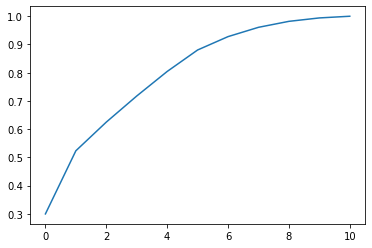

In [80]:
plt.plot(components.explained_variance_ratio_.cumsum())

In [32]:
#7 most significant components

In [81]:
pca = PCA(n_components = 7)

pca.fit(X_train)
X_train = pca.transform(X_train)

In [82]:
#FINDING THE BEST LEARNING RATE 

In [83]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(7,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [84]:
model.compile(loss="BinaryCrossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics="accuracy")

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [85]:
history = model.fit(X_train, Y_train, epochs = 100, callbacks=[lr_scheduler])

Epoch 1/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.4400 - lr: 1.0000e-04
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5107 - lr: 1.1220e-04
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.6128 - lr: 1.2589e-04
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.6992 - lr: 1.4125e-04
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.7508 - lr: 1.5849e-04
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.7767 - lr: 1.7783e-04
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.7879 - lr: 1.9953e-04
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.7912 - lr: 2.2387e-04
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - loss:

28/28 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.6543 - lr: 0.3548
Epoch 73/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6150 - lr: 0.3981
Epoch 74/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6162 - lr: 0.4467
Epoch 75/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.6173 - lr: 0.5012
Epoch 76/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5982 - lr: 0.5623
Epoch 77/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.6229 - lr: 0.6310
Epoch 78/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.7037 - lr: 0.7079
Epoch 79/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6498 - lr: 0.7943
Epoch 80/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.6431 - lr: 0.8

<AxesSubplot:>

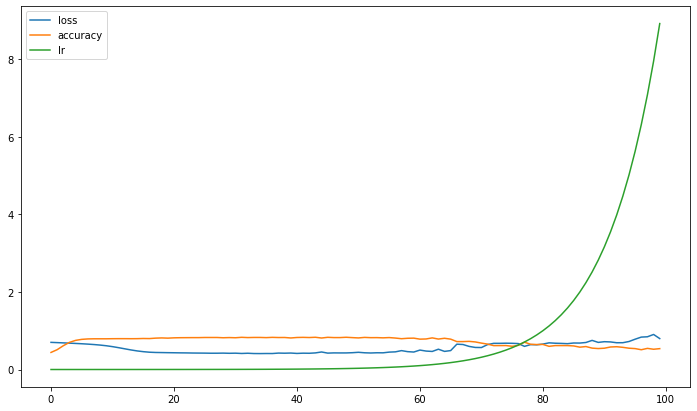

In [86]:
pd.DataFrame(history.history).plot(figsize=(12,7))

In [ ]:
#CREATING MODEL

In [87]:
model_evo1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(7,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_evo1.compile(loss="BinaryCrossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics="accuracy")

model_evo1.fit(X_train, Y_train, epochs = 25)

Epoch 1/25
28/28 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.6554
Epoch 2/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.8025
Epoch 3/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8193
Epoch 4/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8215
Epoch 5/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8272
Epoch 6/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8182
Epoch 7/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.8283
Epoch 8/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8249
Epoch 9/25
28/28 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8294
Epoch 10/25
28/28 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8171
Epoch 11/25
28/28 [

In [88]:
#TESTING DATA PREPROCESING

In [114]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [116]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [117]:
test_num = test[['PassengerId','Pclass','Age','SibSp','Parch','Fare']]
test_cat = test[['Name','Sex','Ticket','Cabin','Embarked']]

In [118]:
test_num = pd.DataFrame(imputer.fit_transform(test_num), columns = ['PassengerId','Pclass','Age','SibSp','Parch','Fare'])
test_num

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892.0,3.0,34.5,0.0,0.0,7.8292
1,893.0,3.0,47.0,1.0,0.0,7.0000
2,894.0,2.0,62.0,0.0,0.0,9.6875
3,895.0,3.0,27.0,0.0,0.0,8.6625
4,896.0,3.0,22.0,1.0,1.0,12.2875
...,...,...,...,...,...,...
413,1305.0,3.0,27.0,0.0,0.0,8.0500
414,1306.0,1.0,39.0,0.0,0.0,108.9000
415,1307.0,3.0,38.5,0.0,0.0,7.2500
416,1308.0,3.0,27.0,0.0,0.0,8.0500


In [119]:
test_num.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [120]:
test_cat = test_cat.fillna('0')
test_cat

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,0,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,0,S
2,"Myles, Mr. Thomas Francis",male,240276,0,Q
3,"Wirz, Mr. Albert",male,315154,0,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,0,S
...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,0,S
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,0,S
416,"Ware, Mr. Frederick",male,359309,0,S


In [121]:
test_cat_encoded = pd.DataFrame(ordinal_encoder.fit_transform(test_cat), columns = ['Name','Sex','Ticket','Cabin','Embarked'])
test_cat_encoded

,Name,Sex,Ticket,Cabin,Embarked
0,206.0,1.0,152.0,0.0,1.0
1,403.0,0.0,221.0,0.0,2.0
2,269.0,1.0,73.0,0.0,1.0
3,408.0,1.0,147.0,0.0,2.0
4,178.0,0.0,138.0,0.0,2.0
...,...,...,...,...,...
413,353.0,1.0,267.0,0.0,2.0
414,283.0,0.0,324.0,23.0,0.0
415,332.0,1.0,346.0,0.0,2.0
416,384.0,1.0,220.0,0.0,2.0


In [122]:
testset = pd.concat([test_num, test_cat_encoded], axis = 1)
testset

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,892.0,3.0,34.5,0.0,0.0,7.8292,206.0,1.0,152.0,0.0,1.0
1,893.0,3.0,47.0,1.0,0.0,7.0000,403.0,0.0,221.0,0.0,2.0
2,894.0,2.0,62.0,0.0,0.0,9.6875,269.0,1.0,73.0,0.0,1.0
3,895.0,3.0,27.0,0.0,0.0,8.6625,408.0,1.0,147.0,0.0,2.0
4,896.0,3.0,22.0,1.0,1.0,12.2875,178.0,0.0,138.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,27.0,0.0,0.0,8.0500,353.0,1.0,267.0,0.0,2.0
414,1306.0,1.0,39.0,0.0,0.0,108.9000,283.0,0.0,324.0,23.0,0.0
415,1307.0,3.0,38.5,0.0,0.0,7.2500,332.0,1.0,346.0,0.0,2.0
416,1308.0,3.0,27.0,0.0,0.0,8.0500,384.0,1.0,220.0,0.0,2.0


In [110]:
#TESTING DATA STANDARDIZING

In [123]:
X_test = StandardScaler().fit_transform(testset)
X_test = MinMaxScaler().fit_transform(testset)
X_test = pca.transform(X_test)
X_test

array([[-0.42938467, -0.01594162,  0.32469425, ..., -0.11917187,
         0.45306963,  0.07048844],
       [ 0.21350814, -0.72476185,  0.57126598, ..., -0.30996495,
        -0.11654157, -0.12356347],
       [-0.09993878,  0.40748685,  0.42053555, ..., -0.23142486,
         0.45533038, -0.17482717],
       ...,
       [-0.6068438 , -0.08962909, -0.03289944, ...,  0.35094642,
        -0.26059129, -0.04804918],
       [-0.55362209, -0.03198488, -0.0688206 , ...,  0.04998675,
        -0.10672551,  0.00504416],
       [-0.35238566,  0.07575375, -0.1257787 , ...,  0.29856109,
         0.86044842,  0.21244502]])

In [ ]:
#PREDICTIONS

In [124]:
pred_evo1 = model_evo1.predict(X_test)

14/14 [==============================] - 0s 923us/step


In [125]:
predictions_evo1 = []
for i in pred_evo1:
    predictions_evo1.append(round(i[0]))
    
index=np.arange(0,418,1)+892
preds_evo1 = pd.DataFrame({'PassengerId':index, 'Survived':predictions_evo1})

In [126]:
preds_evo1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [127]:
preds_evo1['Survived'].sum()

147

In [128]:
preds_evo1.to_csv('Titanic_pred_evo1.csv', index=False)

In [129]:
model_evo1.save('model_evo1.h5')

In [ ]:
#75.8% acc confirmed by Kaggle

In [ ]:
#######################################################################

In [130]:
def k_validation(model, train_data, train_labels,k):
    num_val_samples = len(train_data) // k
    num_epochs = 300
    loss_histories = []
    acc_histories = []

    for i in range(k):
        print('processing fold #', i)
        val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
        val_targets = train_labels[i * num_val_samples: (i+1) * num_val_samples]

        partial_train_data = np.concatenate([
            train_data[:i * num_val_samples],
            train_data[(i+1) * num_val_samples:]
        ], axis=0)
        partial_train_labels = np.concatenate([
            train_labels[:i * num_val_samples],
            train_labels[(i+1) * num_val_samples:]
        ], axis=0)

        history = model.fit(partial_train_data, partial_train_labels, epochs = num_epochs, verbose = 0, 
                           validation_data = (val_data, val_targets))

        loss_history = history.history['val_loss']
        loss_histories.append(loss_history)
        
        acc_history = history.history['val_accuracy']
        acc_histories.append(acc_history)
    
    average_loss_history = []
    average_acc_history = []
    
    for i in range(num_epochs):
        loss_sum_epoch = []
        acc_sum_epoch = []
        for x in range(k):
            loss_sum_epoch.append(loss_histories[x][i])
            acc_sum_epoch.append(acc_histories[x][i])
        average_loss_history.append(np.mean(loss_sum_epoch))
        average_acc_history.append(np.mean(acc_sum_epoch))
    
    plt.figure(figsize=(12,5))
    plt.plot(range(1, len(average_loss_history)+1), average_loss_history)
    plt.plot(range(1, len(average_acc_history)+1), average_acc_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


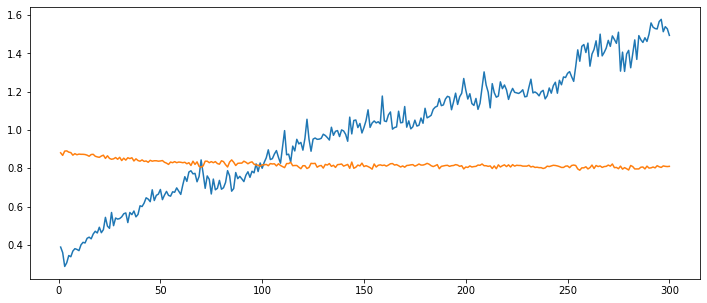

In [131]:
model_evo1_ = tf.keras.models.load_model('C:/Users/pstrz/Sieci Neuronowe/Titanic/model_evo1.h5')
k_validation(model_evo1_, X_train, Y_train, 5)

In [ ]:
#Model is overfitted

In [132]:
model_val = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(7,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_val.compile(loss="BinaryCrossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics="accuracy")

model_val.fit(X_train, Y_train, epochs = 25)

Epoch 1/25
28/28 [==============================] - 0s 962us/step - loss: 0.6650 - accuracy: 0.6004
Epoch 2/25
28/28 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.7643
Epoch 3/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.8002
Epoch 4/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.7969
Epoch 5/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7969
Epoch 6/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.8047
Epoch 7/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.8058
Epoch 8/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.8103
Epoch 9/25
28/28 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8182
Epoch 10/25
28/28 [==============================] - 0s 979us/step - loss: 0.4329 - accuracy: 0.8137
Epoch 11/25
28/

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


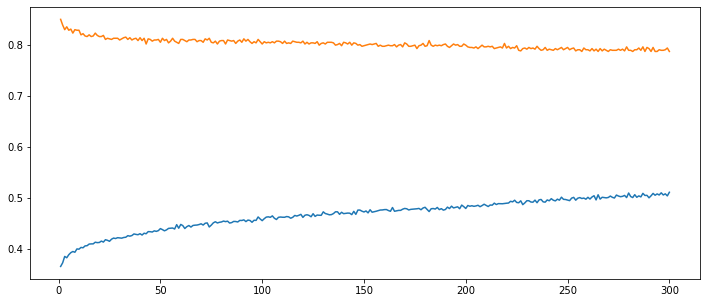

In [133]:
k_validation(model_val, X_train, Y_train, 5)

In [134]:
pred_val = model_val.predict(X_test)

14/14 [==============================] - 0s 1ms/step


In [135]:
predictions_val = []
for i in pred_val:
    predictions_val.append(round(i[0]))
    
index=np.arange(0,418,1)+892
preds_val = pd.DataFrame({'PassengerId':index, 'Survived':predictions_val})

In [136]:
preds_val

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [137]:
preds_val.to_csv('Titanic_pred_val.csv', index=False)

In [138]:
model_val.save('model_val.h5')

In [ ]:
#70% acc confirmed by Kaggle

In [ ]:
#########################################################

In [139]:
model_evo2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(7,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_evo2.compile(loss="BinaryCrossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics="accuracy")

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

lr_history = model_evo2.fit(X_train, Y_train, epochs = 100, callbacks=[lr_scheduler])

Epoch 1/100
28/28 [==============================] - 0s 964us/step - loss: 0.6905 - accuracy: 0.5051 - lr: 1.0000e-04
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5140 - lr: 1.1220e-04
Epoch 3/100
28/28 [==============================] - 0s 1000us/step - loss: 0.6846 - accuracy: 0.5230 - lr: 1.2589e-04
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5342 - lr: 1.4125e-04
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5455 - lr: 1.5849e-04
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5612 - lr: 1.7783e-04
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.5791 - lr: 1.9953e-04
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.6016 - lr: 2.2387e-04
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - 

28/28 [==============================] - 0s 962us/step - loss: 0.4852 - accuracy: 0.7946 - lr: 0.3548
Epoch 73/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7767 - lr: 0.3981
Epoch 74/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7856 - lr: 0.4467
Epoch 75/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.8036 - lr: 0.5012
Epoch 76/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.8070 - lr: 0.5623
Epoch 77/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7912 - lr: 0.6310
Epoch 78/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7677 - lr: 0.7079
Epoch 79/100
28/28 [==============================] - 0s 985us/step - loss: 0.5666 - accuracy: 0.7666 - lr: 0.7943
Epoch 80/100
28/28 [==============================] - 0s 979us/step - loss: 0.7999 - accuracy: 0.7396 - l

<AxesSubplot:>

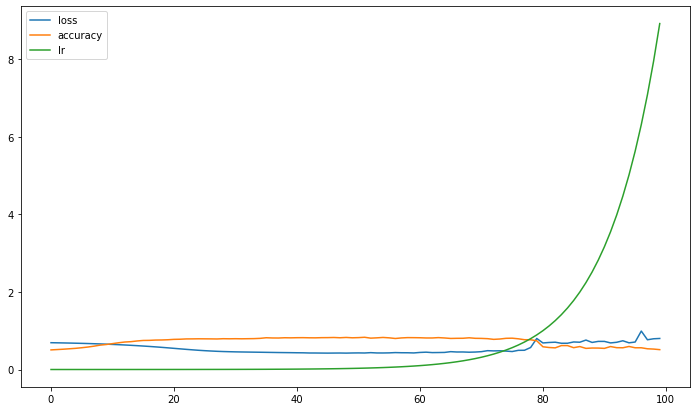

In [140]:
pd.DataFrame(lr_history.history).plot(figsize=(12,7))

In [149]:
model_evo2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(7,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_evo2.compile(loss="BinaryCrossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics="accuracy")
model_evo2.fit(X_train, Y_train, epochs = 50)

Epoch 1/50
28/28 [==============================] - 0s 964us/step - loss: 0.6408 - accuracy: 0.6285
Epoch 2/50
28/28 [==============================] - 0s 1ms/step - loss: 0.5233 - accuracy: 0.7497
Epoch 3/50
28/28 [==============================] - 0s 985us/step - loss: 0.4727 - accuracy: 0.8070
Epoch 4/50
28/28 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.7946
Epoch 5/50
28/28 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.8002
Epoch 6/50
28/28 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.7969
Epoch 7/50
28/28 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.8025
Epoch 8/50
28/28 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7980
Epoch 9/50
28/28 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8114
Epoch 10/50
28/28 [==============================] - 0s 957us/step - loss: 0.4388 - accuracy: 0.8070
Epoch 11/50
2

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


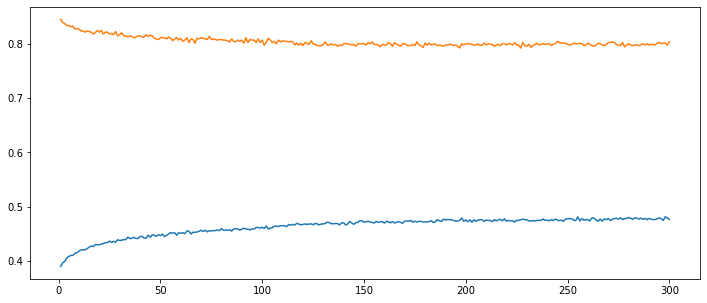

In [150]:
k_validation(model_evo2, X_train, Y_train, 5)

In [151]:
pred_evo2 = model_evo2.predict(X_test)

14/14 [==============================] - 0s 847us/step


In [152]:
predictions_evo2 = []
for i in pred_evo2:
    predictions_evo2.append(round(i[0]))
    
index=np.arange(0,418,1)+892
preds_evo2 = pd.DataFrame({'PassengerId':index, 'Survived':predictions_evo2})

In [153]:
preds_evo2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [154]:
preds_evo2.to_csv('Titanic_pred_evo2.csv', index=False)

In [155]:
model_evo2.save('model_evo2.h5')

In [ ]:
#77.8% acc confirmed by Kaggle